## Dependencies

In [43]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

seed = 1000

## Read the CSV and Perform Basic Data Cleaning

In [44]:
df = pd.read_csv("../Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all') #No null columns
# Drop the null rows
df = df.dropna() #No missing values
df.head()
df.shape

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


(6991, 41)

## Data attributes and desctiption

From [explanet archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#pdisposition), the following descriptions are retrieved. `Kepler Object of Interest` is acronymed as `KOI`.

1. koi_disposition : The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. (THIS is the target value)
1. koi_fpflag_nt : Not Transit-Like Flag (A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.) (Boolean)
1. koi_fpflag_ss : Stellar Eclipse Flag. A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC. (Boolean)
1. koi_fpflag_co : Centroid Offset Flag. The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture. (Boolean)
1. koi_fpflag_ec : Ephemeris Match Indicates Contamination Flag. The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk. (Boolean)
1. koi_period : Orbital Period (days). The interval between consecutive planetary transits. (float)
1. koi_period_err1: koi period positive error bar (float)
1. koi_period_err2: koi period negative error bar (float)
1. koi_time0bk: Transit Epoch (BJD - 2,454,833.0). The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. (float)
1. koi_time0bk_err1: koi time0bk positive error bar (float)
1. koi_time0bk_err2: koi time0bk negative error bar (float)
1. koi_impact: 	Impact Parameter. The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius. (float)
1. koi_impact_err1: koi impact positive error bar (float)
1. koi_impact_err2: koi impact negative error bar (float)
1. koi_duration: Transit Duration (hours). The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. Contact times are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris. (float)
1. koi_duration_err1: koi duration positive error bar (float)
1. koi_duration_err2: koi duration negative error bar (float)
1. koi_depth: Transit Depth (parts per million). The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris. (float)
1. koi_depth_err1: koi depth positive error bar (float)
1. koi_depth_err2: koi depth negative error bar (float)
1. koi_prad: Planetary Radius (Earth radii). The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius (float)
1. koi_prad_err1: koi prad positive error bar (float)
1. koi_prad_err2: koi prad negative error bar (float)
1. koi_teq: Equilibrium Temperature (Kelvin). Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet. (int)
1. koi_insol: Insolation Flux [Earth flux]: Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun. (float)
1. koi_insol_err1: koi insol positive error bar (float)
1. koi_insol_err2: koi insol negative error bar (float)
1. koi_model_snr: Transit Signal-to-Noise. Transit depth normalized by the mean uncertainty in the flux during the transits. (float)
1. koi_tce_plnt_num: TCE Planet Number. TCE Planet Number federated to the KOI. (int)
1. koi_steff: Stellar Effective Temperature (Kelvin). The photospheric temperature of the star. (int)
1. koi_steff_err1: koi steff positive error bar (int)
1. koi_steff_err2: koi steff negative error bar (int)
1. koi_slogg: Stellar Surface Gravity (log10(cm s-2)). The base-10 logarithm of the acceleration due to gravity at the surface of the star. (float)
1. koi_slogg_err1: koi slogg positive error bar (float)
1. koi_slogg_err2: koi slogg negative error bar (float)
1. koi_srad: Stellar Radius (solar radii). The photospheric radius of the star (float)
1. koi_srad_err1: koi srad positive error bar (float)
1. koi_srad_err2: koi srad negative error bar (float)
1. ra: RA (deg): KIC Right Ascension (float)
1. dec: Dec (deg). KIC Declination (float)
1. koi_kepmag: Kepler-band (mag). Kepler-band (mag) (float)

# Data Processing and Model Pipeline

![pipeline](../Images/pipeline.png)

## Train Test Split

In [45]:
X = df[df.columns.difference(['koi_disposition'])]
Y = df['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed)

## Feature Selection

https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=RFE%20is%20a%20wrapper%2Dtype%20feature%20selection%20algorithm.&text=This%20is%20achieved%20by%20fitting,specified%20number%20of%20features%20remains.

**Approach**

- Use RFE wrapper with Random Forest Estimator for feature selection.
- Use repeated stratified k-fold cross-validation, with 3 repeats and 5 folds.
- Use an SVC to train the data, and score the model created with those features


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_features = [1]+list(range(5,len(X_train.columns)+5,5))
scores = []
for no in num_features:
    # create pipeline
    scaler = MinMaxScaler()
    rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=no, verbose=5)
    model = SVC(kernel='rbf', C=100)
    pipeline = Pipeline(steps=[('scale', scaler), ('feature_selection',rfe),('model',model)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # Append the scores for the "no" of features
    scores.append(n_scores)


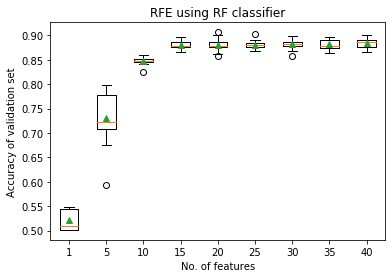

In [29]:
# plot model performance for comparison
_=plt.boxplot(scores, labels=num_features, showmeans=True)
_=plt.xlabel("No. of features")
_=plt.ylabel("Accuracy of validation set")
_=plt.title("RFE using RF classifier")
_=plt.savefig("RFE.png")
_=plt.show()

- 30 features looks like the right options as it is stable (less std deviation in accuracy of all models).
- Also, the accuracy is similar to that of all features.

In [ ]:
# Sort all features based on importance (lower ranking => high importance)
# rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=1, verbose=5)
# rfe.fit(X_train, y_train)
# pd.DataFrame({'features':X.columns.to_list(), 'ranking':rfe.ranking_}).sort_values(by='ranking')

- Based on grid search 30 features are being chosen

- Selected features
          ['dec', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_impact',
       'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_kepmag',
       'koi_model_snr', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_steff_err1',
       'koi_steff_err2', 'koi_teq', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'ra']

In [46]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=30, verbose=5)
rfe.fit(X_train, y_train)

Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=30, verbose=5)

In [48]:
#X_train.columns[rfe.support_]
X_train = X_train[X_train.columns[rfe.support_]]
X_test = X_test[X_test.columns[rfe.support_]]

# XGB without Fine Tuning

In [49]:
# create pipeline
scaler = MinMaxScaler()
#rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=30, verbose=5)
model = XGBClassifier(objective='multi:softmax', num_boost_round = 100, early_stopping_rounds = 10)
pipeline = Pipeline(steps=[('scale', scaler), ('model',model)])

pipeline.fit(X_train, y_train)


[02:37:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('scale', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=10,
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_boost_round=100,
                               num_parallel_tree=1, objective='multi:softprob',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters

In [50]:
print(f"Train accuracy : {pipeline.score(X_train, y_train)}")
print(f"Test accuracy : {pipeline.score(X_test, y_test)}")

Train accuracy : 1.0
Test accuracy : 0.8947368421052632


# GridSearch CV to tune XGB parameters

- Mainly 3 parameters to tune in XGB     
 - max_depth (Tree depth)
 - min_child_weight (Minimum sum of instance weight (hessian) needed in a child. In case of regression problems, it is simply the number of data points)
 - eta (alpha)

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'model__max_depth': [4, 6, 8],
              'model__min_child_weight': [0.25, 0.5, 1, 2, 4], 
              'model__eta': [0.1, 0.2, 0.3]
               }

# create pipeline
scaler = MinMaxScaler()
#rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=30, verbose=5)
model = XGBClassifier(objective='multi:softmax', num_boost_round = 100, early_stopping_rounds = 10) #By default num_boost_round = 100, early_stopping_rounds = 10
pipeline = Pipeline(steps=[('scale', scaler),('model',model)])

gcv = GridSearchCV(
        pipeline, 
        param_grid,
        cv=10,
        scoring = 'accuracy',
        verbose=5
    )

gcv.fit(X_train, y_train) 


Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.901, total=   2.2s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.888, total=   2.3s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.920, total=   2.5s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s remaining:    0.0s


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.912, total=   2.1s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.889, total=   2.1s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25, score=0.914, total=   2.1s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=0.25 
[03:42:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or

[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=0.5, score=0.903, total=   3.3s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=1 ...
[03:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=1, score=0.905, total=   2.9s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=1 ...
[03:43:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or som

[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=2, score=0.897, total=   2.4s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=2 ...
[03:43:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=2, score=0.914, total=   2.9s
[CV] model__eta=0.1, model__max_depth=4, model__min_child_weight=2 ...
[03:43:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.1, model__max_depth=4, model__min_child_weight=4, score=0.908, total=   2.0s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=0.25 
[03:44:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=0.25, score=0.909, total=   3.0s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=0.25 
[03:44:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=0.5, score=0.889, total=   4.0s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=0.5 .
[03:45:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=0.5, score=0.905, total=   3.4s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=0.5 .
[03:45:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=1, score=0.895, total=   3.6s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=2 ...
[03:46:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=2, score=0.907, total=   3.0s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=2 ...
[03:46:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=4, score=0.897, total=   3.4s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=4 ...
[03:46:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=6, model__min_child_weight=4, score=0.912, total=   3.3s
[CV] model__eta=0.1, model__max_depth=6, model__min_child_weight=4 ...
[03:46:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=0.25, score=0.897, total=   4.4s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=0.5 .
[03:47:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=0.5, score=0.910, total=   4.8s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=0.5 .
[03:48:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or 

[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=1, score=0.884, total=   8.7s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=1 ...
[03:49:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=1, score=0.903, total=   5.9s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=1 ...
[03:49:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=2, score=0.905, total=   5.3s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=4 ...
[03:50:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.1, model__max_depth=8, model__min_child_weight=4, score=0.910, total=   4.0s
[CV] model__eta=0.1, model__max_depth=8, model__min_child_weight=4 ...
[03:50:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=0.25, score=0.897, total=   2.5s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=0.25 
[03:51:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=0.25, score=0.903, total=   3.2s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=0.25 
[03:51:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or

[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=0.5, score=0.908, total=   2.5s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=1 ...
[03:52:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=1, score=0.903, total=   2.5s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=1 ...
[03:52:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or som

[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=2, score=0.903, total=   5.7s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=2 ...
[03:52:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=2, score=0.901, total=   3.2s
[CV] model__eta=0.2, model__max_depth=4, model__min_child_weight=2 ...
[03:53:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.2, model__max_depth=4, model__min_child_weight=4, score=0.906, total=   2.2s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=0.25 
[03:53:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=0.25, score=0.903, total=   3.3s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=0.25 
[03:53:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=0.5, score=0.887, total=   3.1s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=0.5 .
[03:54:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=0.5, score=0.905, total=   3.4s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=0.5 .
[03:54:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=1, score=0.893, total=   3.7s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=2 ...
[03:55:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=2, score=0.909, total=   3.8s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=2 ...
[03:55:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=4, score=0.895, total=   4.4s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=4 ...
[03:56:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=6, model__min_child_weight=4, score=0.903, total=   4.3s
[CV] model__eta=0.2, model__max_depth=6, model__min_child_weight=4 ...
[03:56:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=0.25, score=0.899, total=   3.8s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=0.5 .
[03:57:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=0.5, score=0.905, total=   3.6s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=0.5 .
[03:57:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or 

[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=1, score=0.885, total=   3.5s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=1 ...
[03:58:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=1, score=0.908, total=   3.7s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=1 ...
[03:58:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=2, score=0.899, total=   6.0s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=4 ...
[04:00:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.2, model__max_depth=8, model__min_child_weight=4, score=0.903, total=   3.5s
[CV] model__eta=0.2, model__max_depth=8, model__min_child_weight=4 ...
[04:00:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=0.25, score=0.897, total=   2.5s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=0.25 
[04:01:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=0.25, score=0.906, total=   3.9s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=0.25 
[04:01:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or

[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=0.5, score=0.897, total=   2.5s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=1 ...
[04:01:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=1, score=0.897, total=   3.2s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=1 ...
[04:01:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or som

[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=2, score=0.887, total=   2.0s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=2 ...
[04:02:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=2, score=0.906, total=   1.9s
[CV] model__eta=0.3, model__max_depth=4, model__min_child_weight=2 ...
[04:02:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.3, model__max_depth=4, model__min_child_weight=4, score=0.901, total=   2.0s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=0.25 
[04:03:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=0.25, score=0.903, total=   4.3s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=0.25 
[04:03:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=0.5, score=0.887, total=   3.0s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=0.5 .
[04:04:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=0.5, score=0.905, total=   4.3s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=0.5 .
[04:04:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or s

[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=1, score=0.891, total=   3.2s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=2 ...
[04:05:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=2, score=0.899, total=   3.1s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=2 ...
[04:05:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=4, score=0.885, total=   6.2s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=4 ...
[04:06:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=6, model__min_child_weight=4, score=0.893, total=   6.7s
[CV] model__eta=0.3, model__max_depth=6, model__min_child_weight=4 ...
[04:06:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=0.25, score=0.908, total=   5.0s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=0.5 .
[04:07:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=0.5, score=0.910, total=   6.5s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=0.5 .
[04:07:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or 

[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=1, score=0.891, total=   3.5s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=1 ...
[04:08:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=1, score=0.901, total=   8.3s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=1 ...
[04:08:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=2, score=0.908, total=   3.4s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=4 ...
[04:09:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  model__eta=0.3, model__max_depth=8, model__min_child_weight=4, score=0.893, total=   3.4s
[CV] model__eta=0.3, model__max_depth=8, model__min_child_weight=4 ...
[04:09:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stopping_rounds, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some 

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 28.2min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=10,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                        

In [71]:
gcv.best_params_
gcv.best_score_
#{'model__eta': 0.2, 'model__max_depth': 6, 'model__min_child_weight': 2}
#0.9023438749545619

{'model__eta': 0.2, 'model__max_depth': 6, 'model__min_child_weight': 2}

0.9023438749545619

## Evaluate the final model on test data

MinMaxScaler()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.895


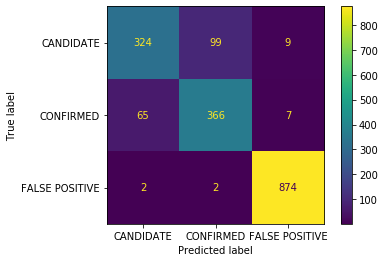

In [72]:
# rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=30, verbose=5)
# rfe.fit(X_train, y_train)
# X_train_selected_features = rfe.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = XGBClassifier(objective='multi:softmax', eta = 0.2, min_child_weight = 2, max_depth = 6)
model.fit(X_train_scaled, y_train)

#On test
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

#Final test accuracy
print('Accuracy: %.3f' % model.score(X_test_scaled, y_test))

plot_confusion_matrix(model, 
             X_test_scaled,
             y_test,
             values_format='d'
            )


## Save the model

In [73]:
import joblib
filename = 'Bincy_Narath_XGB.sav'
joblib.dump(model, filename)

['Bincy_Narath_XGB.sav']